<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center> Unsupervised Learning </center></h1>


   <h1><center><font size=4>AllLife Bank Customer Segmentation</center></font></h1>

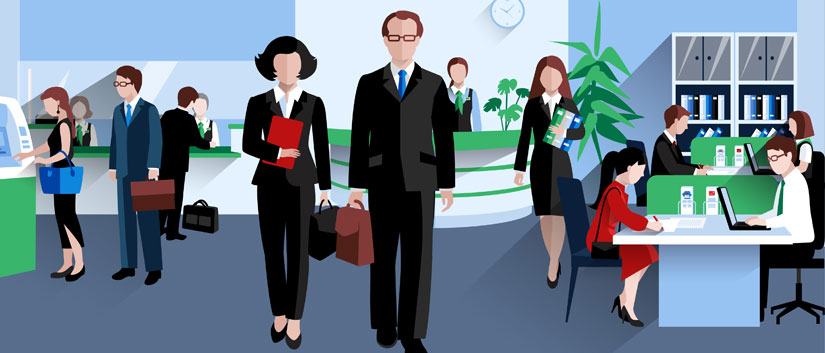

By Sweta Prasad

## Problem Statement

### Context


AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


###  Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
data = pd.read_excel("//content/Credit+Card+Customer+Data.xlsx") ## Complete the code to import the data

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
data.shape


(660, 7)

There are 660 rows and 7 columns.

### Displaying few rows of the dataset

In [ ]:
# viewing the first 5 rows of the data
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


### Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

### Checking the data types of the columns for the dataset

In [ ]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


## Observation
- There are 660 Observations and 7 columns in the dataset.

- All columns have 660 non-null values i.e there are no missing vlaues.

- All columns are of int64 datatype

- There are no missing values.

### Checking the missing values

In [ ]:
# checking for missing values
df.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in the data.

In [ ]:
# checking the number of unique values in each column
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [ ]:
df.nunique()

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

### Checking for duplicates values

**Let's look at the duplicate values in the *Customer_Key* column closely.**

In [ ]:
# getting the count for each unique value in Customer_Key
data_grouped = df.groupby("Customer_Key").count()

for i in data_grouped.loc[data_grouped.Sl_No >= 2].index:
    display(data.loc[df.Customer_Key == i])

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


Customer Key is an identifier and has repeated values.

Drop the colums that is not needed for analysis

In [ ]:
df.drop(columns=["Sl_No"], inplace=True) # complete the code to drop the columns
df.drop(columns=["Customer_Key"], inplace=True) # complete the code to drop the columns

In [ ]:
duplicate_keys = data.duplicated('Customer Key') == True
duplicate_keys

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool

Drop duplicated Keys

In [ ]:
df= df[duplicate_keys == False]

In [ ]:
df[df.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [ ]:
#drop these duplicated rowa from the data
df=df[~df.duplicated()]
df.shape

(644, 5)


- There are 644 unique observations and 5 columns in our data after removing the duplicated keys

### Statistical summary of the dataset

In [ ]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**

- Average of Average Credit Limit is around 35K with 50% of customers having a credit limit not more  than 18K, which implies a high positive skewness.
- Looking at standard deviation, of Average credit limit is 37K and that is considerably high variation in credit limits as well.
- On average, credit cards owned by each customer are ~5 and some customers have 10
- On average, most customer interactions are through calls, then online. Also, some customers never contacted/visited the bank.

In [ ]:
np.random.seed(1)  # To get the same random results every time
display(df.sample(8))  # Print sample records
print(f'\nThere are {df.shape[0]} rows and {df.shape[1]} columns.\n')  # Shape of the input file

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
368,20000,4,3,0,3
453,74000,4,4,0,3
471,48000,6,3,2,2
396,73000,6,4,2,0
516,32000,7,4,0,3
470,37000,5,5,1,4
556,60000,4,5,0,4
588,55000,4,3,1,0



There are 644 rows and 5 columns.



Check the distribution and Outliers of each variable in the data

In [ ]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
df.tail()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0
659,167000,9,0,12,2


In [ ]:
#undesrtand the Data quality(completeness , uniqueness )
print ("Rows     : " , df.shape[0])  #get number of rows/observations
print ("Columns  : " , df.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", df.nunique())  #  count of unique values
print ("#"*40,"\nDuplicate Values:  \n\n",df.duplicated().sum())  # check number of duplicate records

Rows     :  644
Columns  :  5
######################################## 
 Features : 

 ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
######################################## 
Missing values :

 Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
######################################## 
Percent of missing :

 Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_visits_bank      0.0
Total_visits_online    0.0
Total_calls_made       0.0
dtype: float64
######################################## 
Unique values :  

 Avg_Credit_Limit       109
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64
######################################## 
Duplicate Values:  

 0


Out of 644 rows of customers:
- There are 109 distinct average credit limits
- There are 10 distinct total credit cards


In [ ]:
for i in df.columns:
    print(df[i].value_counts(normalize=True)*100)

8000      4.968944
6000      4.658385
13000     4.347826
9000      4.192547
19000     4.037267
10000     3.881988
7000      3.726708
11000     3.726708
14000     3.571429
18000     3.416149
16000     3.416149
17000     3.416149
5000      3.105590
20000     3.105590
15000     2.639752
12000     2.639752
36000     1.708075
70000     1.552795
50000     1.242236
38000     1.242236
56000     1.086957
68000     1.086957
39000     1.086957
74000     0.931677
34000     0.931677
48000     0.931677
41000     0.931677
37000     0.931677
30000     0.931677
52000     0.776398
47000     0.776398
65000     0.776398
26000     0.776398
31000     0.776398
29000     0.776398
69000     0.621118
51000     0.621118
33000     0.621118
49000     0.621118
71000     0.621118
73000     0.621118
64000     0.621118
60000     0.621118
54000     0.621118
66000     0.621118
28000     0.465839
59000     0.465839
62000     0.465839
57000     0.465839
100000    0.465839
72000     0.465839
45000     0.465839
58000     0.

**customers using different modes of communication**

In [ ]:
## ONLY ONLINE


- 7 customers who never contacted bank through calls and visited bank but used only online
- These customer have more number of credit cards and more online visits

In [ ]:
## ONLY VISITS
print(df[(df['Total_calls_made']==0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']==0)].count())
# df[(df['Total_calls_made']==0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']==0)]

Avg_Credit_Limit       30
Total_Credit_Cards     30
Total_visits_bank      30
Total_visits_online    30
Total_calls_made       30
dtype: int64


- 30 customers who never contacted bank through calls and not used online but visited bank
- Need to see the demographics of customers to know why are they not using call or online services and preferring only visiting bank

In [ ]:
## USED CALLS AND ONLINE BUT NEVER VISITED
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']!=0)].count()

Avg_Credit_Limit       90
Total_Credit_Cards     90
Total_visits_bank      90
Total_visits_online    90
Total_calls_made       90
dtype: int64

In [ ]:
## USED CALLS AND VISITS BUT NOT ONLINE
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']==0)].count()

Avg_Credit_Limit       111
Total_Credit_Cards     111
Total_visits_bank      111
Total_visits_online    111
Total_calls_made       111
dtype: int64

In [ ]:
## USED ALL 3 MODES OF COMMUNICATION
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']!=0)].count()

Avg_Credit_Limit       349
Total_Credit_Cards     349
Total_visits_bank      349
Total_visits_online    349
Total_calls_made       349
dtype: int64

349 customers used all 3 banking options (calls / online / visited) which is(54%) more than half of our customer database

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

**Let's see the distribution of different variables in the dataset**

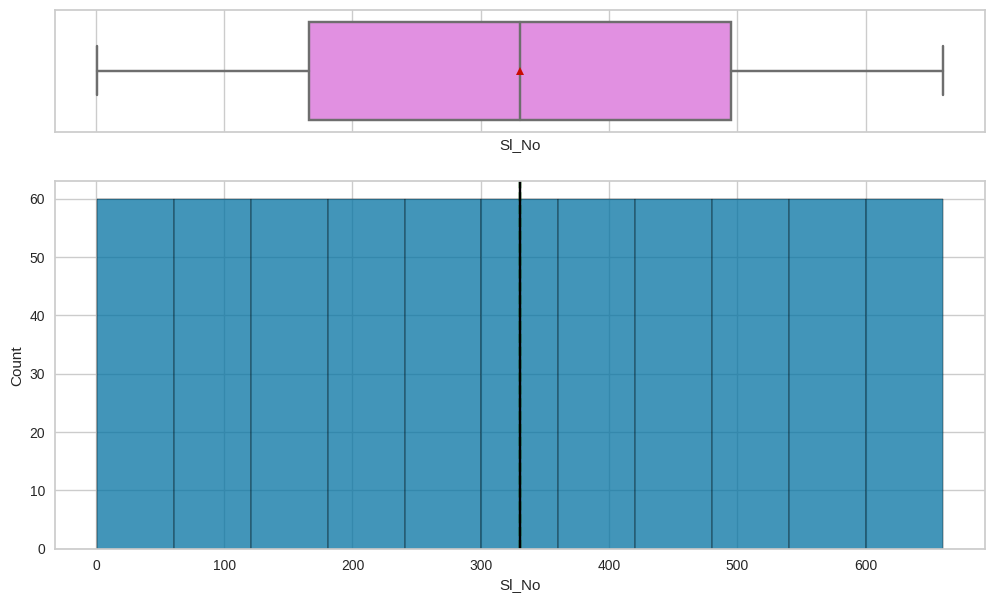

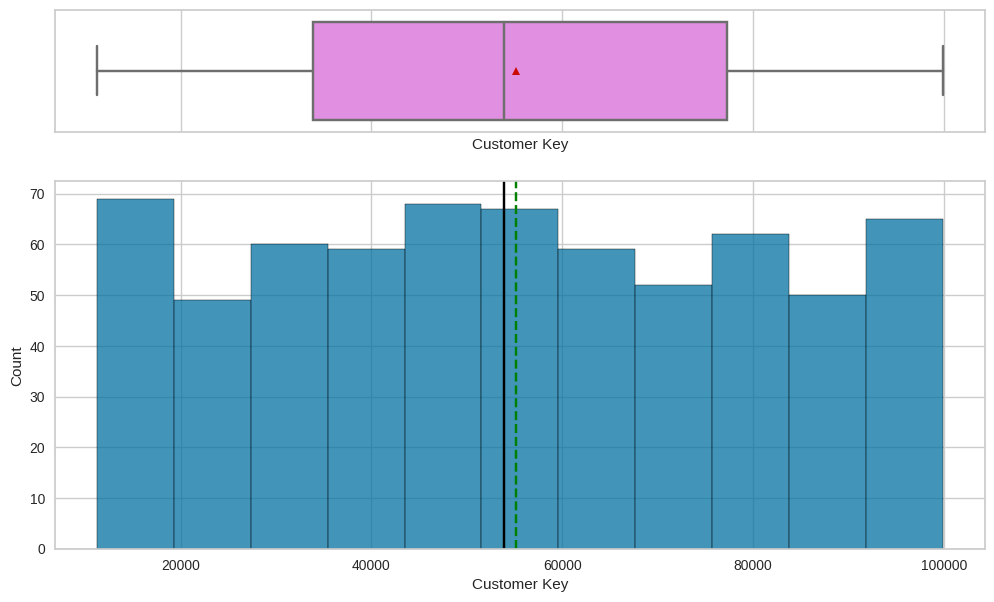

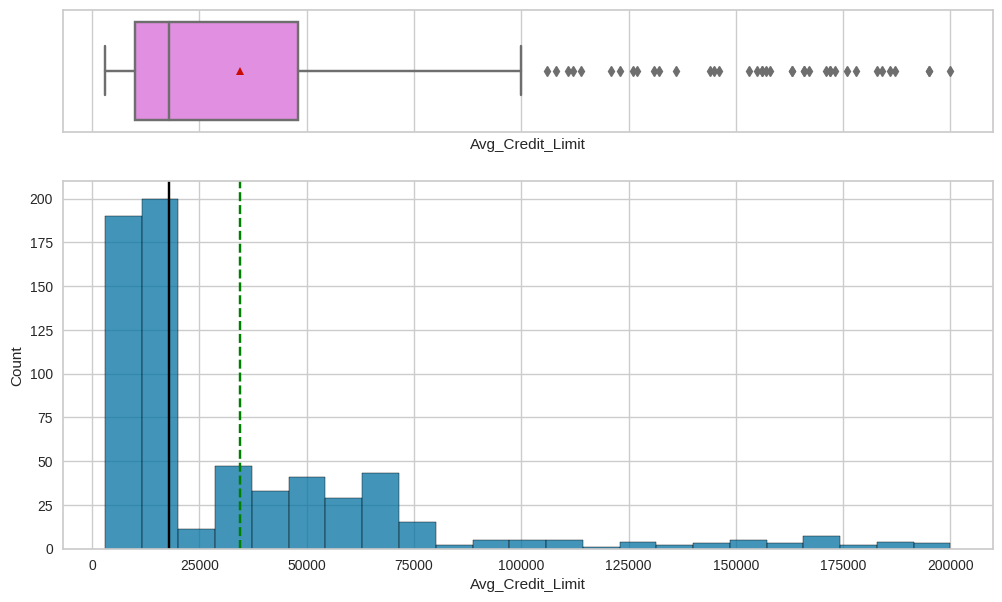

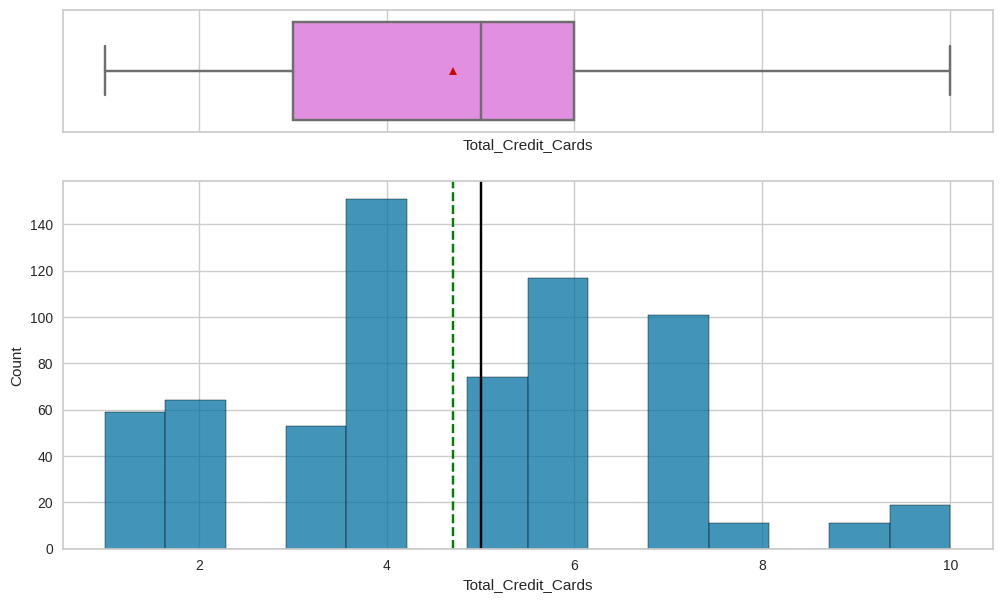

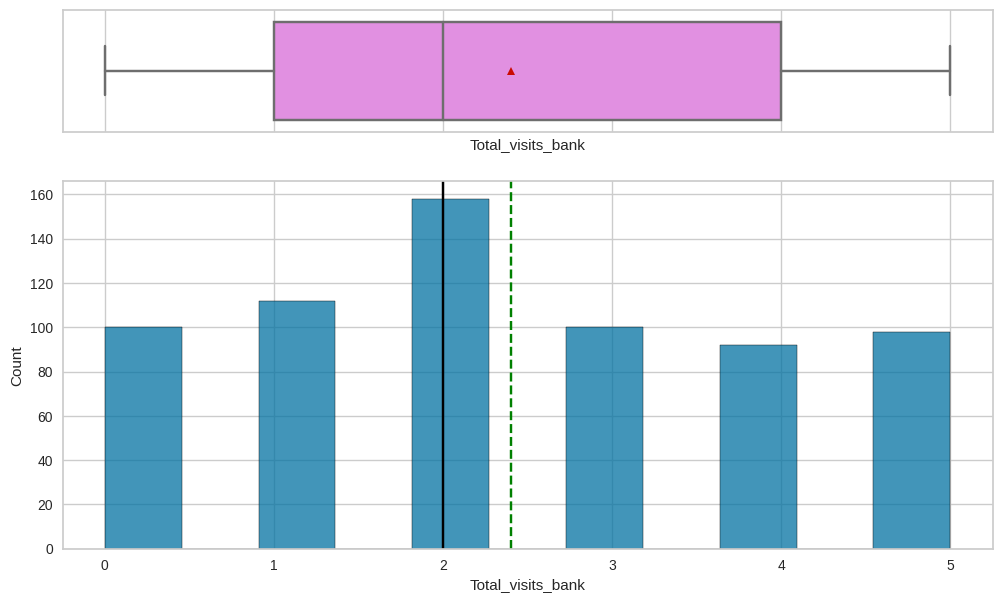

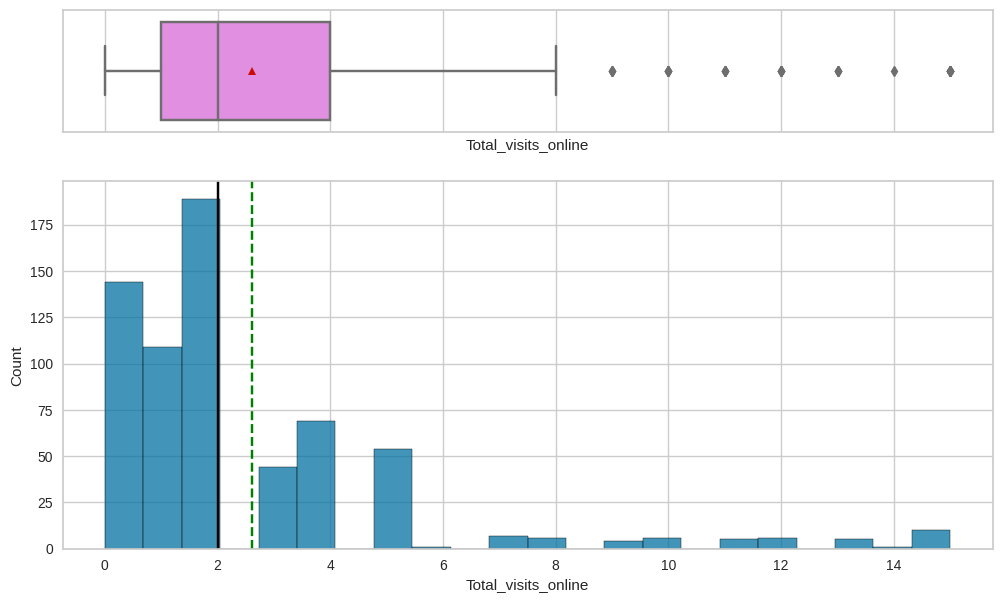

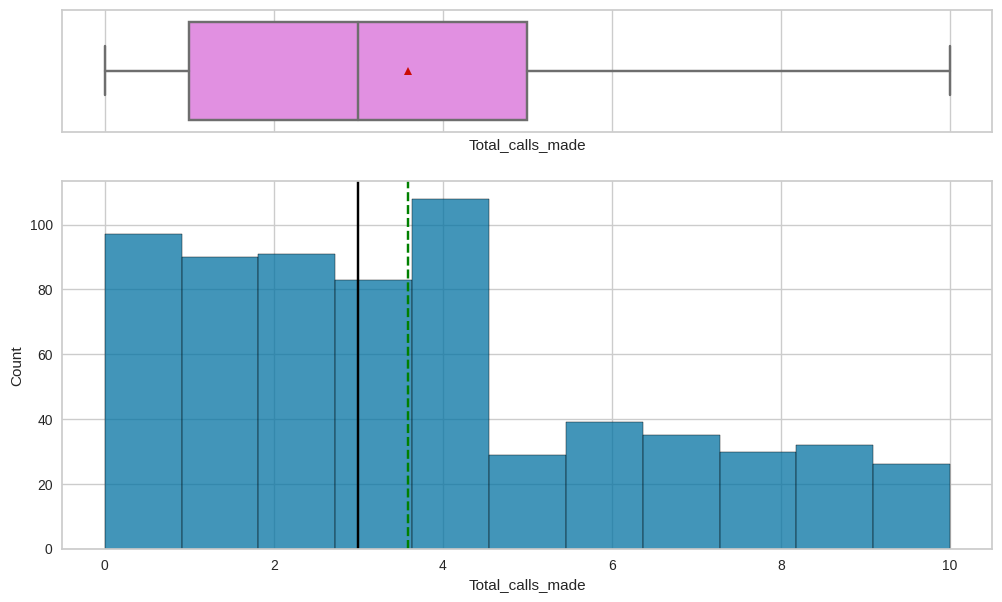

In [ ]:
for col in data.columns:
    histogram_boxplot(data, col)

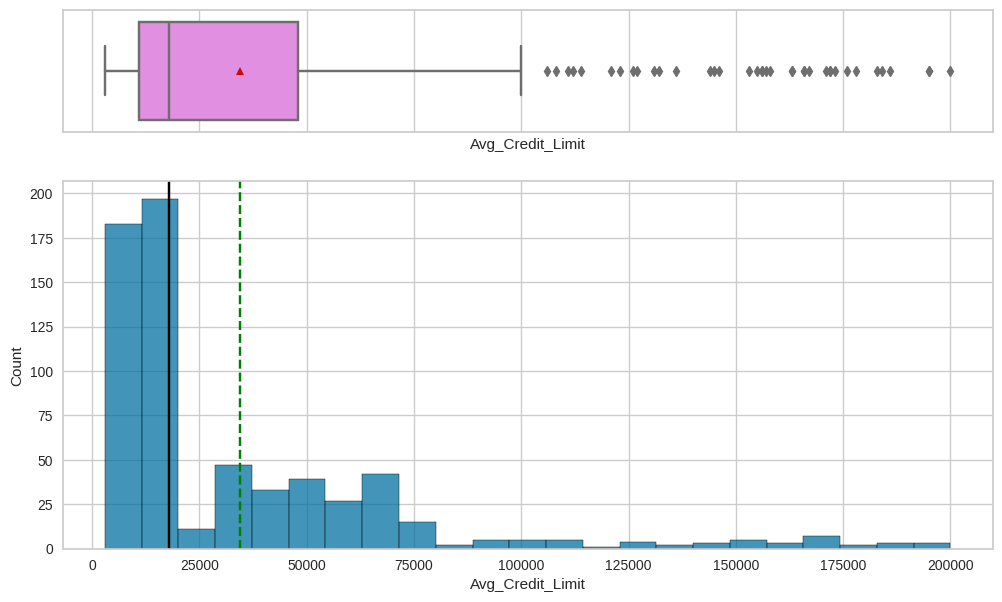

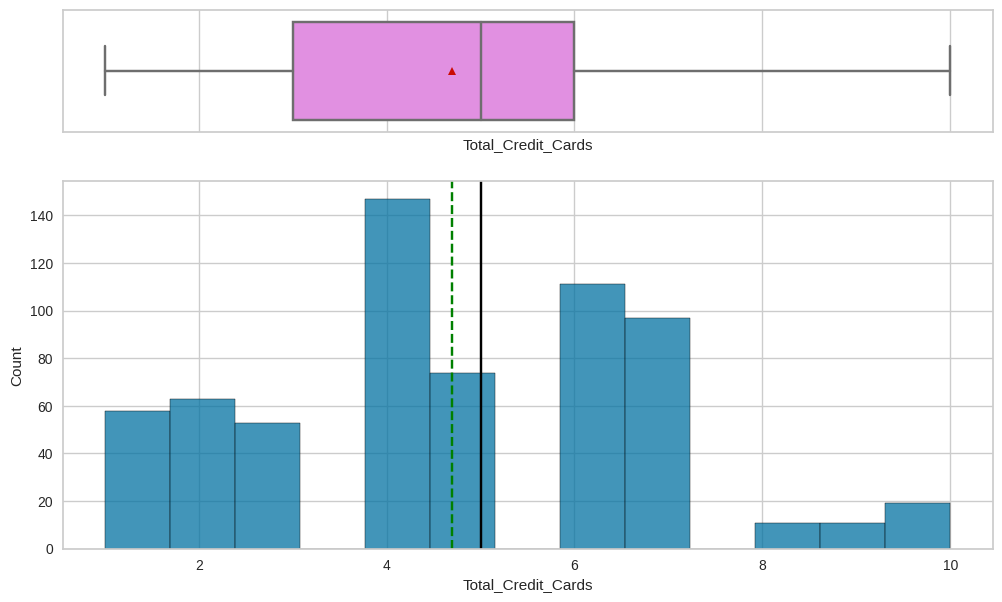

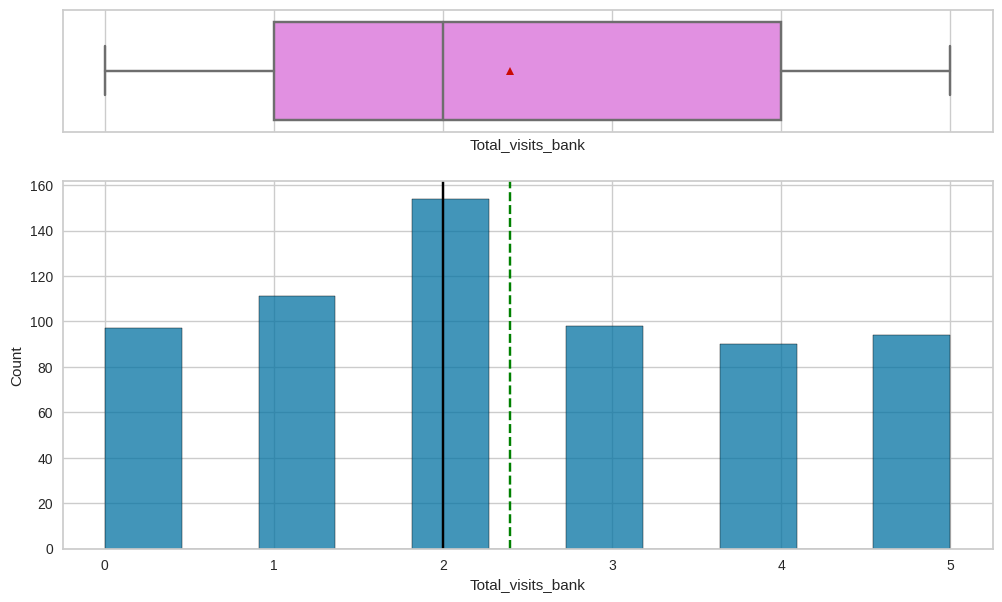

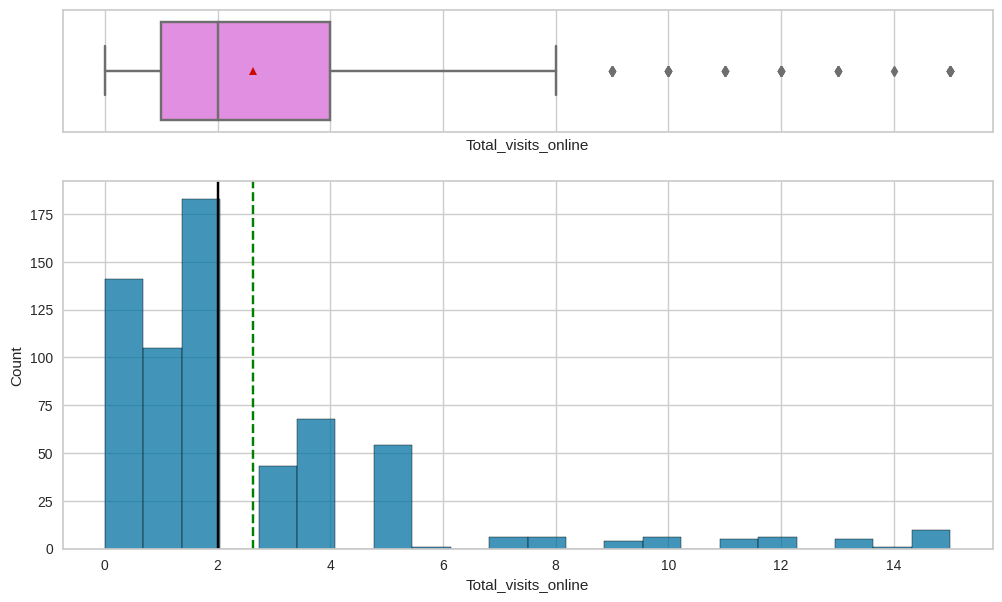

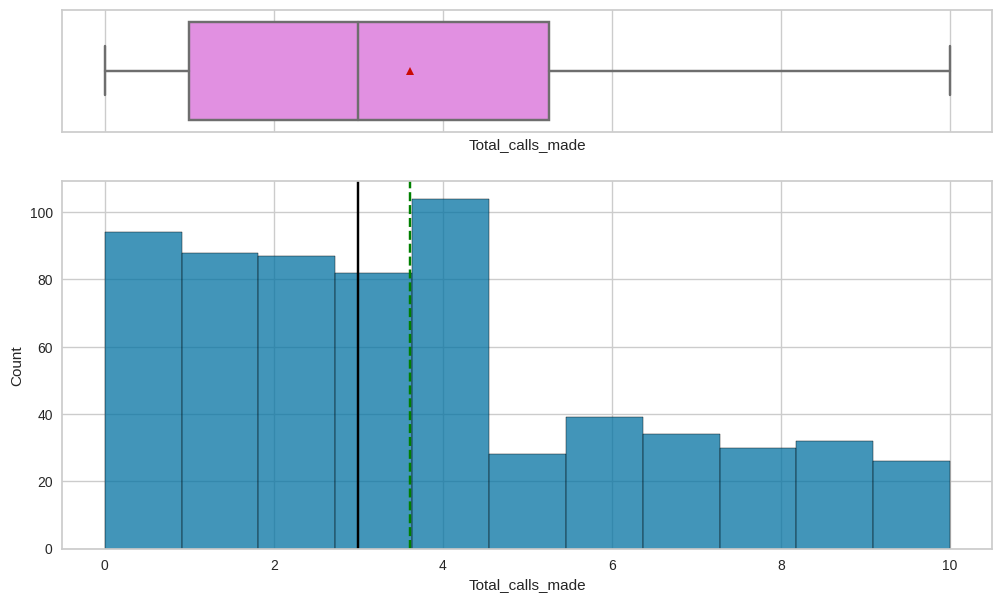

In [ ]:
for col in df.columns:
    histogram_boxplot(df, col)

- Many outliers in average credit limit. High credit customers are causing skewness.
- Online visits are mostly between 1 and 4.  

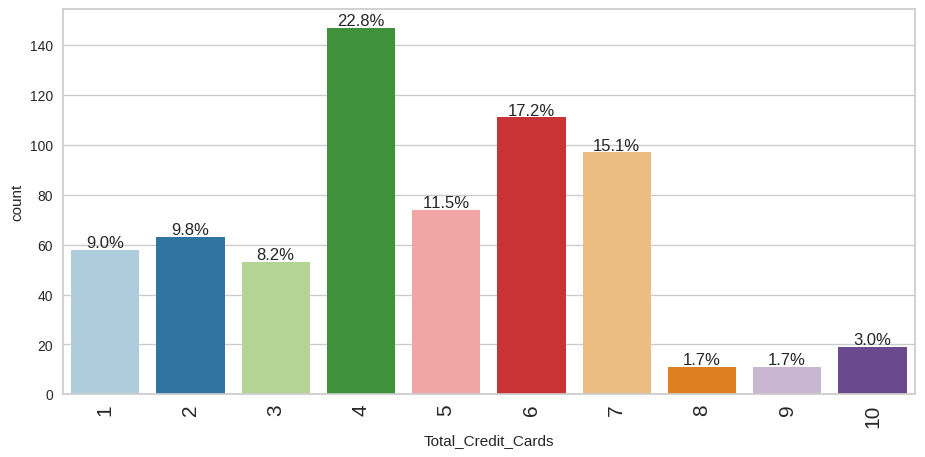

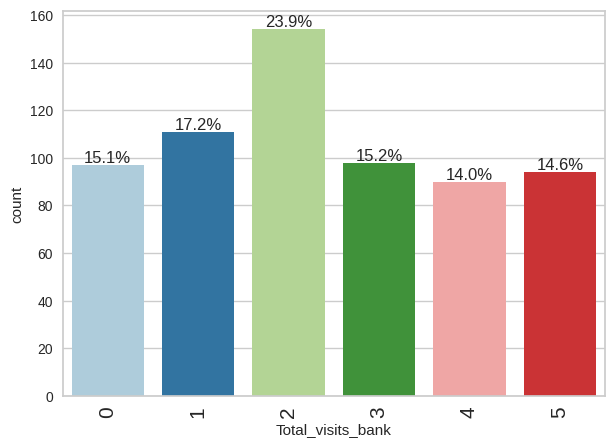

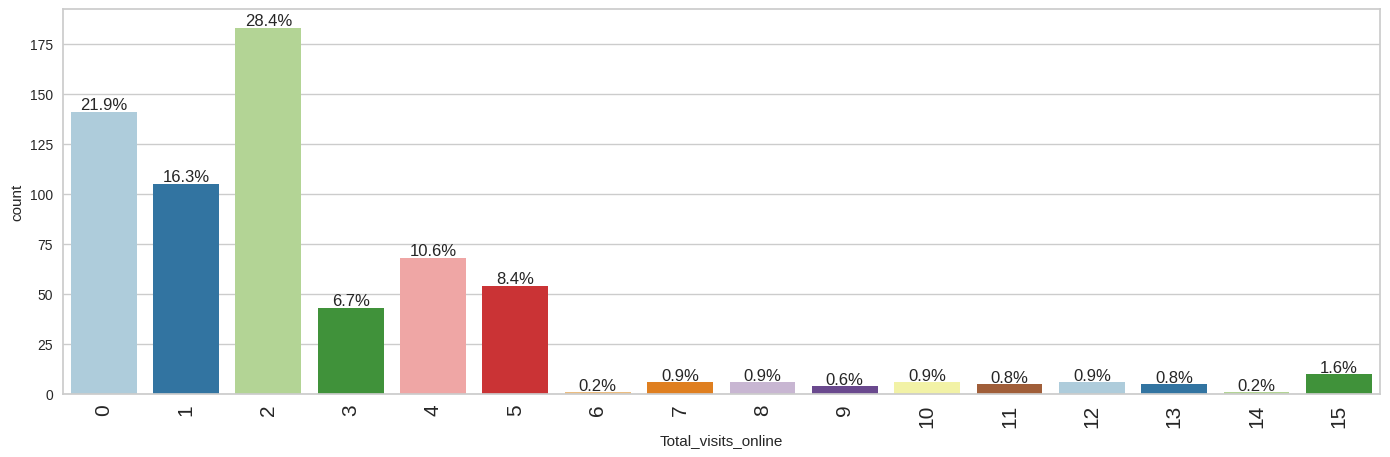

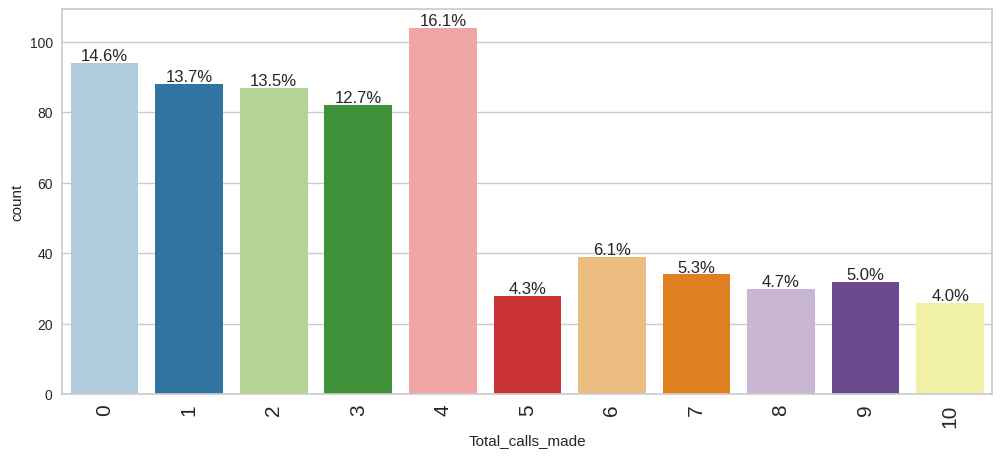

In [ ]:
for col in df.columns.tolist()[1:]:
    labeled_barplot(df, col, perc=True)

- Most customers have 4 credit cards and then 6 and 7 credit cards. Very few have >=8 cards
-  majority of visits by most of the customers are <=5
- majority of customers made <=4 calls to the bank

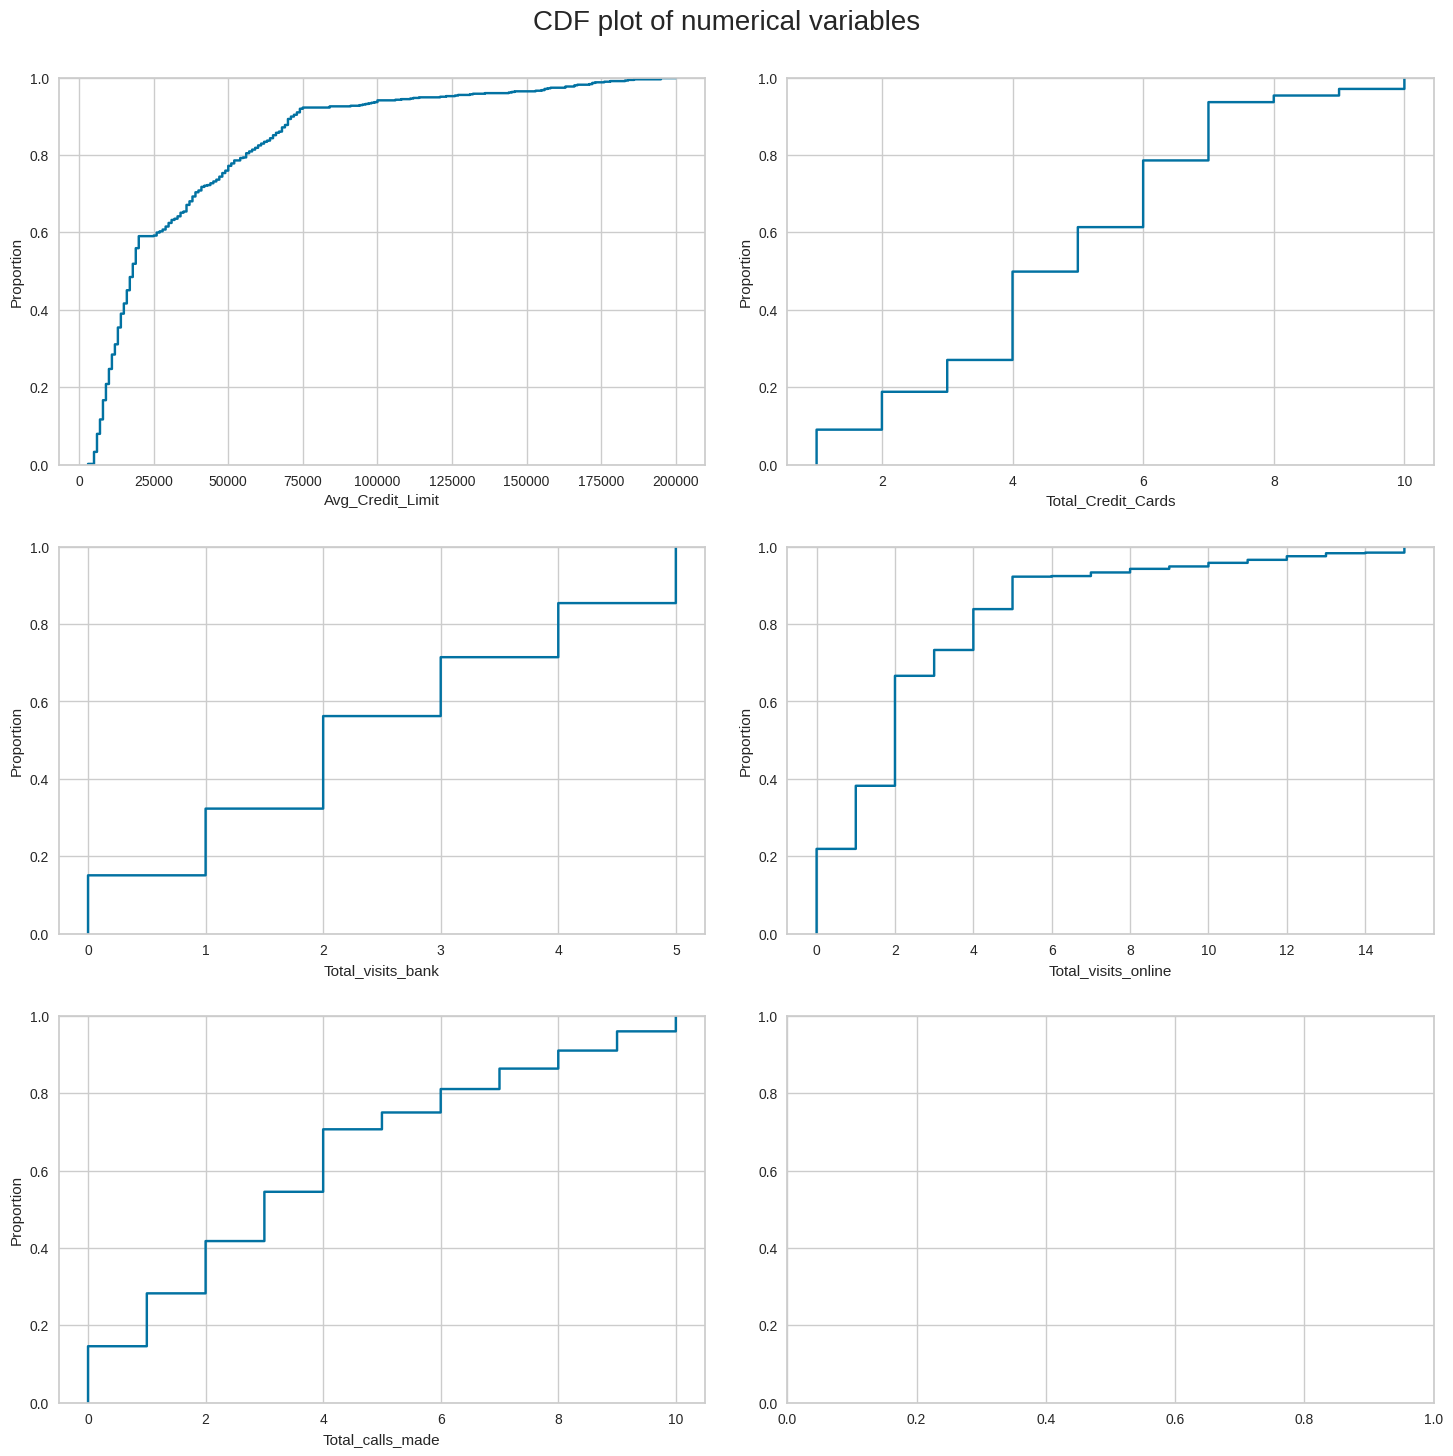

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

In [ ]:
## Group by total credit cards and mean of diff. modes of communication
df.groupby('Total_Credit_Cards').mean().iloc[:,1:5]

,Total_visits_bank,Total_visits_online,Total_calls_made
Total_Credit_Cards,,,
1,0.948276,3.517241,7.258621
2,0.936508,3.539683,6.555556
3,0.867925,3.698113,6.641509
4,2.761905,1.741497,3.530612
5,3.256757,1.216216,2.135135
6,3.585586,1.153153,1.873874
7,3.206186,1.525773,2.164948
8,0.636364,9.272727,0.818182
9,0.727273,11.272727,1.272727


- Customers having more number of credit cards (8-10) credit cards are visiting online more compared to less no of cards holding customers

- More calls are from customers having less number of credit cards (1-4)

### Bivariate Analysis

**Let's check for correlations.**

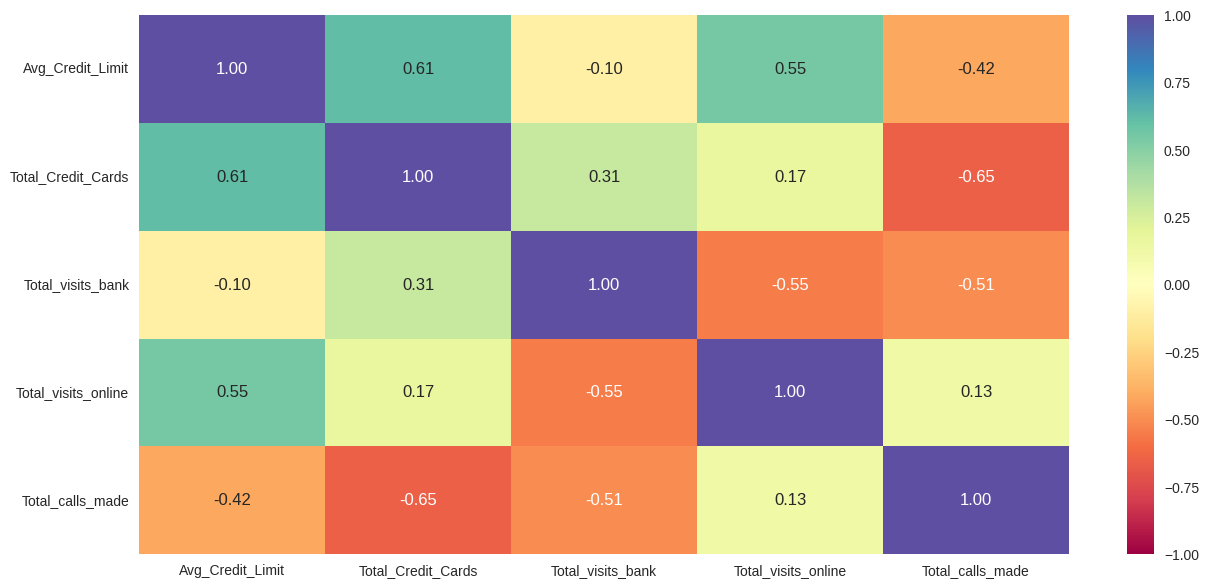

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- Avg_Credit_Limit is positively correlated(0.61) with Total_Credit_Cards
-Positvecorrelation (0.55) between credit limit and visits online
- Avg_Credit_Limit is negatively correlated(0.42) with Total_calls_made and Total_visits_bank(-.10).
-Negatively coreltaion(-0.65) between call meade and total credit cards.
Negative correlation (-0.55) between Total visits online and total visits bank
- Total_visits_bank, Total_calls_made are negatively correlated(-0.51)

In [ ]:
print('We will check the summary of below columns: \n', df.columns.tolist())

We will check the summary of below columns: 
 ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


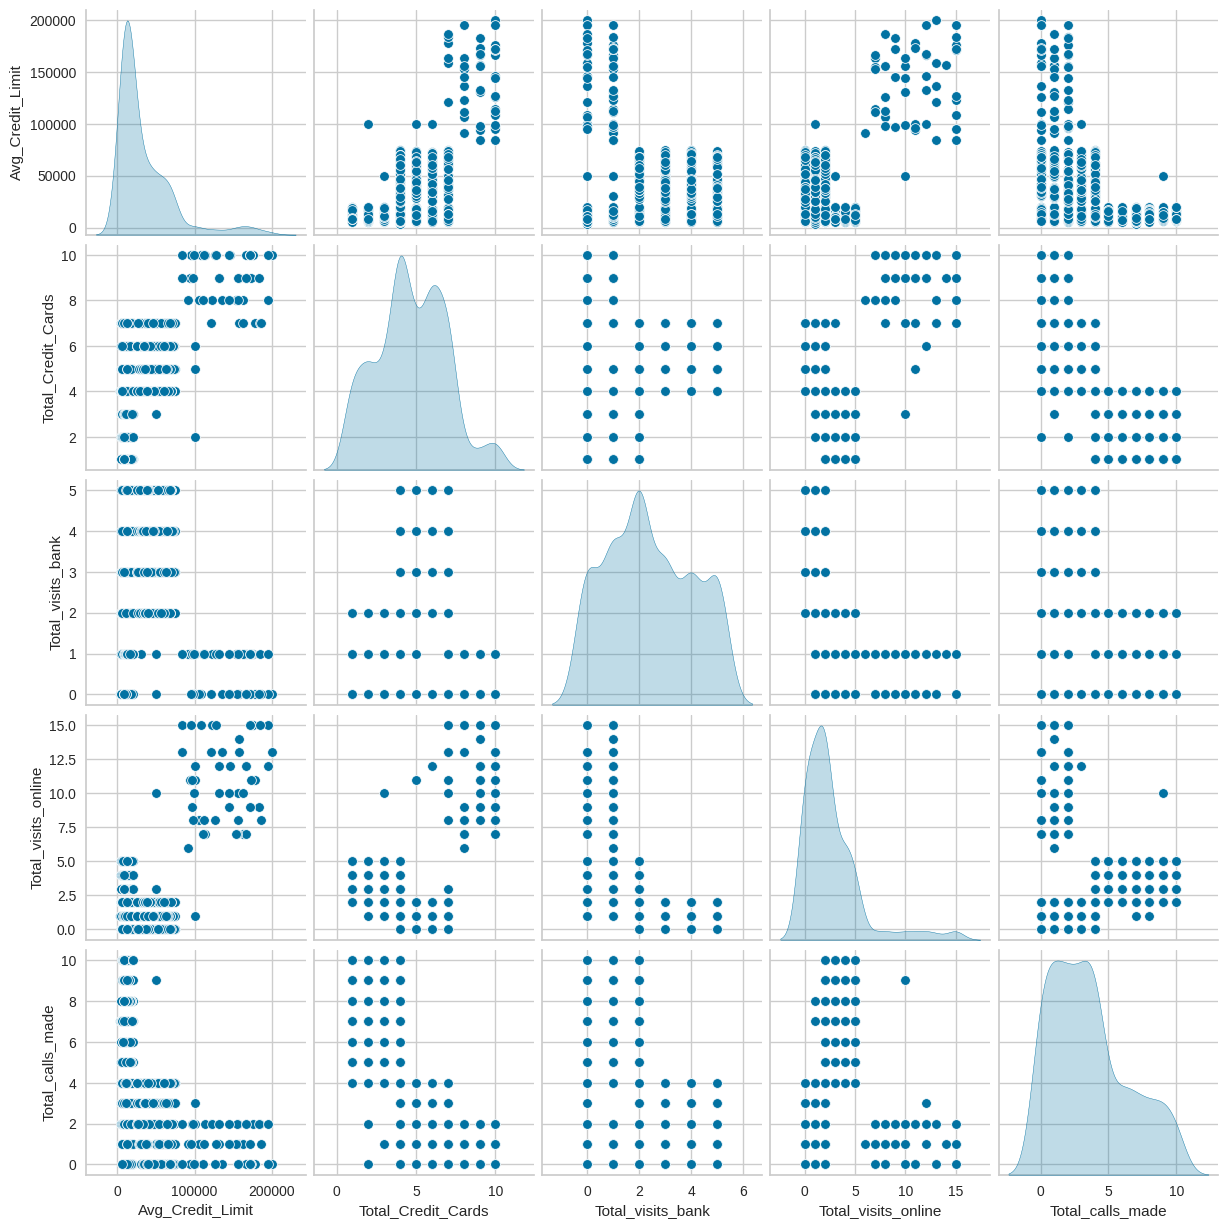

In [ ]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

From diagonal plots:
- we can see "Visits Online" has 4-6 points (majorly) - Calls made
- shows 2 peaks majorily - visits bank - shows 5 peaks - credit cards shows 4 peaks

-From Bivariate plots:
- we can see 2 clusters between credit limit and credit cards
- 2 clusters between credit limit and visit online - 2 clusters between total visits online and credit cards
- 3 clusters between total visits online and calls made
- Credit cards and visit online have +ve relationship
- Credit limits and visit online have +ve relationship
- Visit bank and visit online have -ve relationship
- visit to bank and calls made have -ve relationship
- kind of -ve relationship between credit limit and calls made; credit limits and visit to bank; credit cards and calls made

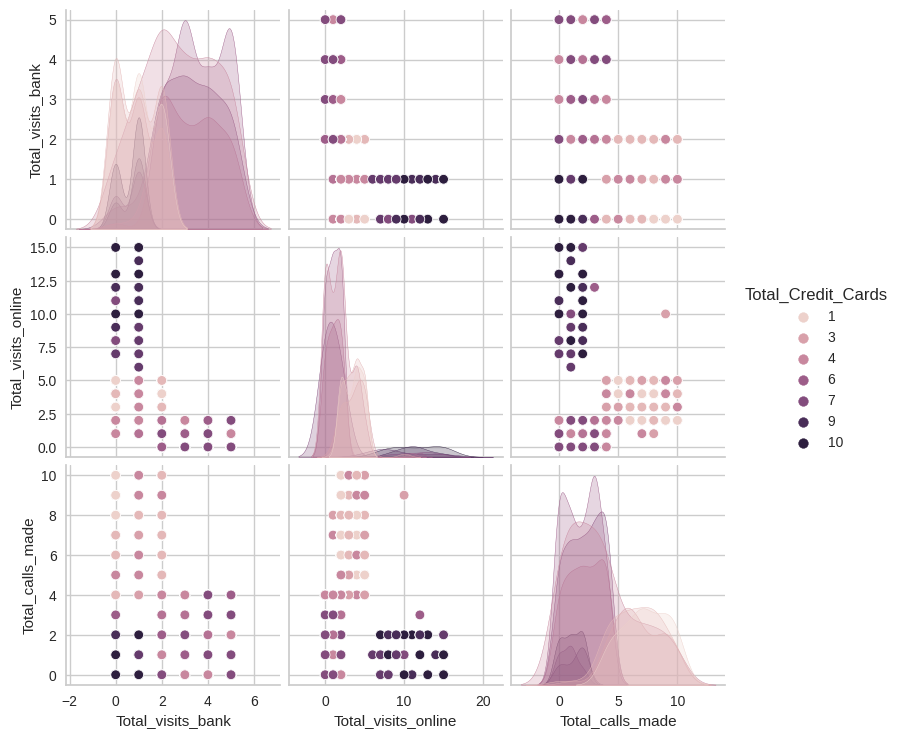

In [ ]:
sns.pairplot(
    data=df[
        [
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "Total_Credit_Cards",
        ]
    ],
    hue="Total_Credit_Cards",
)

plt.show()

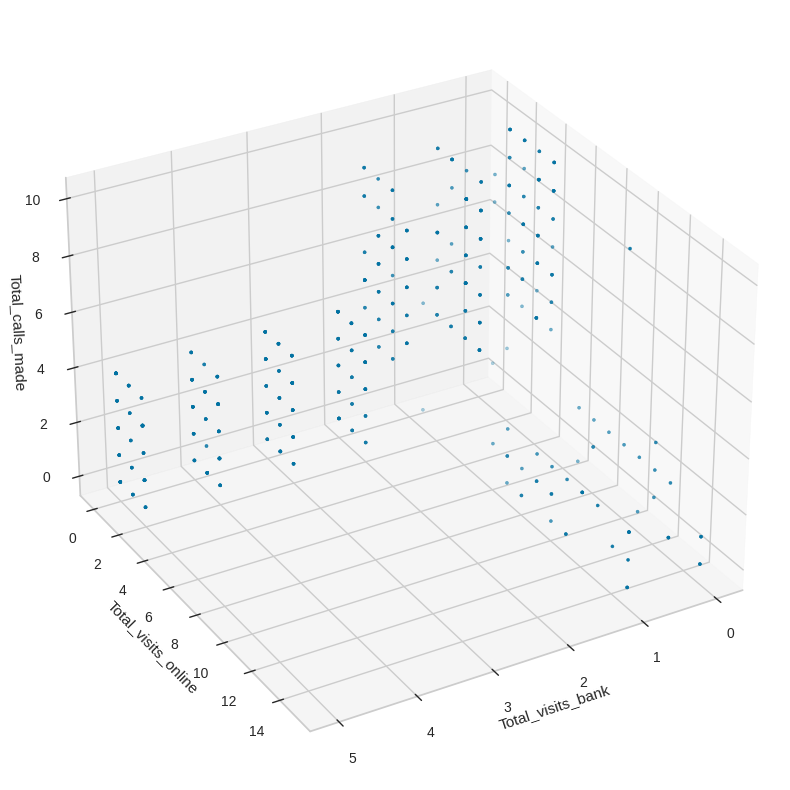

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Total_visits_bank"]
y = df["Total_visits_online"]
z = df["Total_calls_made"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Total_visits_bank")
ax.set_ylabel("Total_visits_online")
ax.set_zlabel("Total_calls_made")
ax.view_init(azim=60)
plt.show()

## Data Preprocessing



### Outlier Detection

- Let's find outliers in the data using z-score with a threshold of 3.

In [ ]:
threshold = 3 # wite the value of the threshold
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Avg_Credit_Limit : [153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 195000, 195000, 200000]

 Total_Credit_Cards : []

 Total_visits_bank : []

 Total_visits_online : [12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

 Total_calls_made : []


### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset =df[col].copy()  ## Complete the code to scale the data
#subset_scaled = scaler.fit_transform(subset)

In [ ]:
#Scaling the data set before clustering
scaler=StandardScaler()
subset=df.copy()  ## Complete the code to scale the data
subset_scaled=scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering
- K-means is often referred to as Lloyd’s algorithm.
- The algorithm has three steps.
-The first step chooses the initial centroids, with the most basic method being to choose samples from the dataset .
-After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid.
-The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid.
-The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

source: www.scikit-learn.org


Finding the best number of Clusters(K)

- A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.
- The Elbow Method is one of the most popular methods to determine this optimal value of k.


### Checking Elbow Plot

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 2 	Average Distortion: 1990.0051006552412
Number of Clusters: 3 	Average Distortion: 904.5314077290889
Number of Clusters: 4 	Average Distortion: 757.9515672576824
Number of Clusters: 5 	Average Distortion: 683.3903512099814
Number of Clusters: 6 	Average Distortion: 621.9556879763101
Number of Clusters: 7 	Average Distortion: 581.9954558189102
Number of Clusters: 8 	Average Distortion: 549.481681742454
Number of Clusters: 9 	Average Distortion: 527.1544632200703
Number of Clusters: 10 	Average Distortion: 494.6083532350331


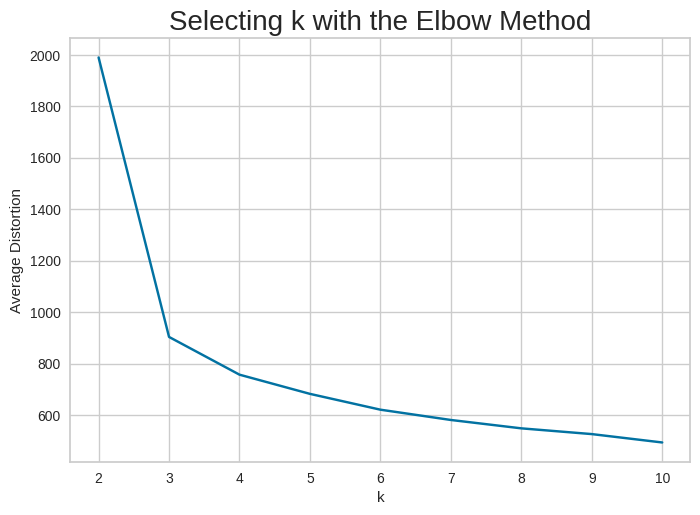

In [ ]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = sum(
        np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1) ** 2)

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

Appropriate value for k look like to be 3

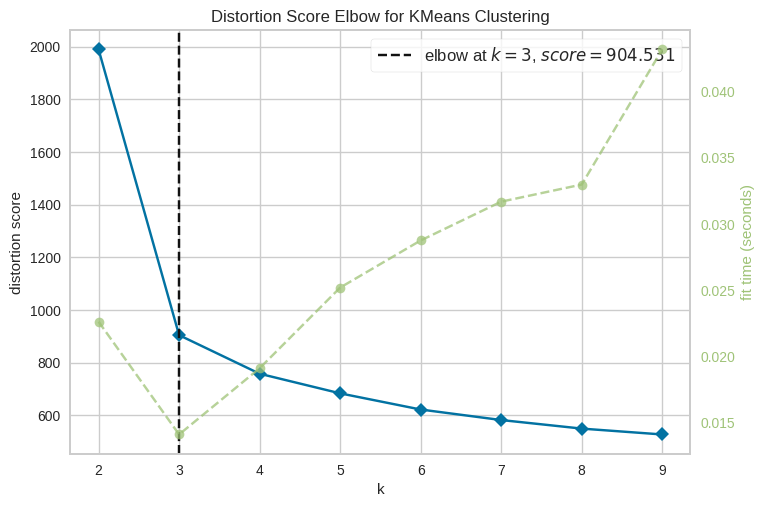

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Here Elbow at K is 3

Silhouette Scores


silhouette score=p−q/max(p,q)

 -  p is the mean distance to the points in the nearest cluster that the data point is not a part of q is the mean intra-cluster distance to all the points in its own cluster.
 - The value of the silhouette score range lies between -1 to 1.
 - A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
 - A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


### Let's check the silhouette scores

In [ ]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.4181821218700665)
For n_clusters = 3, the silhouette score is 0.5159851043844376)
For n_clusters = 4, the silhouette score is 0.3564224736236835)
For n_clusters = 5, the silhouette score is 0.2719503504413783)
For n_clusters = 6, the silhouette score is 0.25674577972845697)
For n_clusters = 7, the silhouette score is 0.24819256530694367)
For n_clusters = 8, the silhouette score is 0.2271298547957195)
For n_clusters = 9, the silhouette score is 0.22222891613112866)


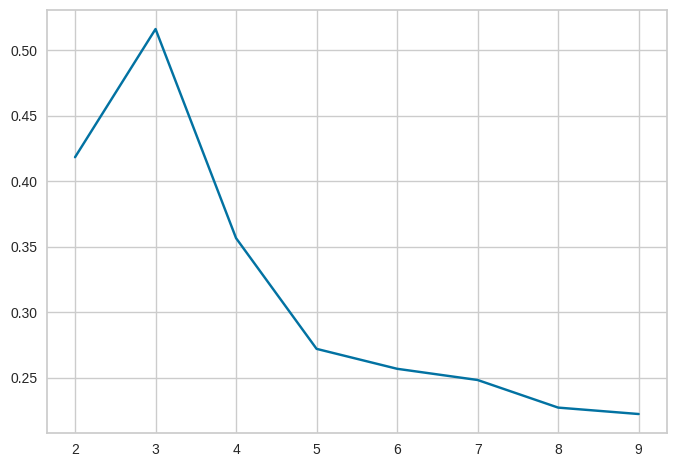

In [ ]:
plt.plot(cluster_list, sil_score)
plt.show()

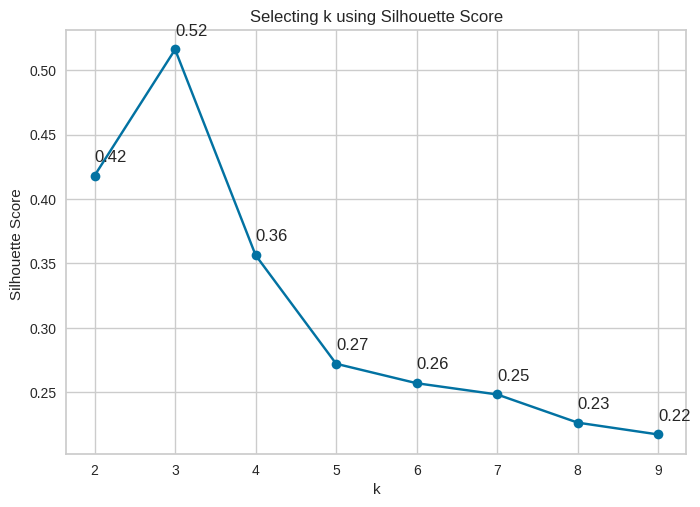

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(subset_scaled_df)
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)

plt.plot(cluster_list, sil_score, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette Score ")
plt.title("Selecting k using Silhouette Score")
for x,y in zip(cluster_list, sil_score):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x + 0.2,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

- The visualization is much higher and K=3 is very good choice.
- k=4 is not that better than K=6,7,8,9
- Silhouette score for 3 is 0.52 much higher than 4 and 5.
- So we will choose 3 as value of K


**Let's visualize the silhouette scores for different number of clusters**

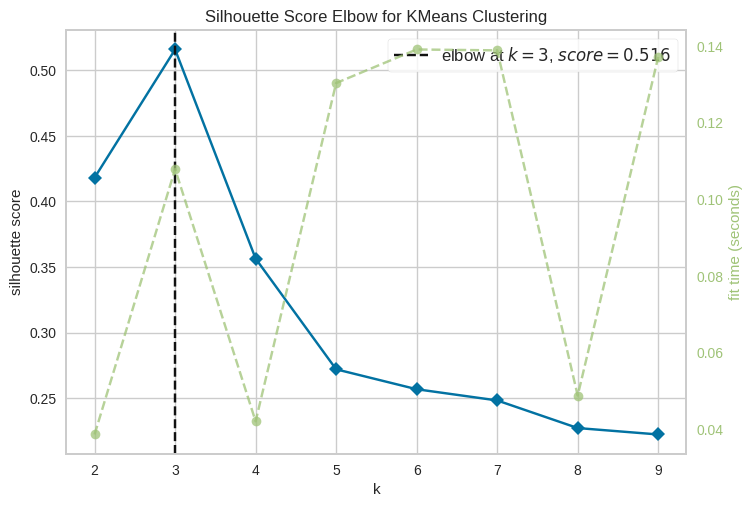

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True) ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

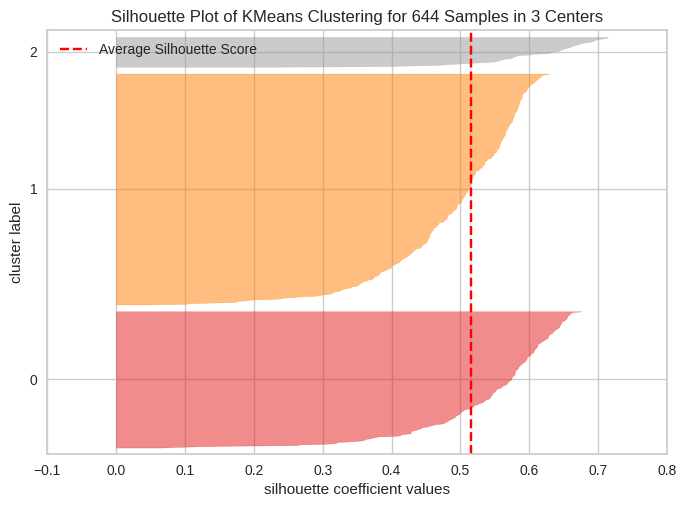

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 644 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

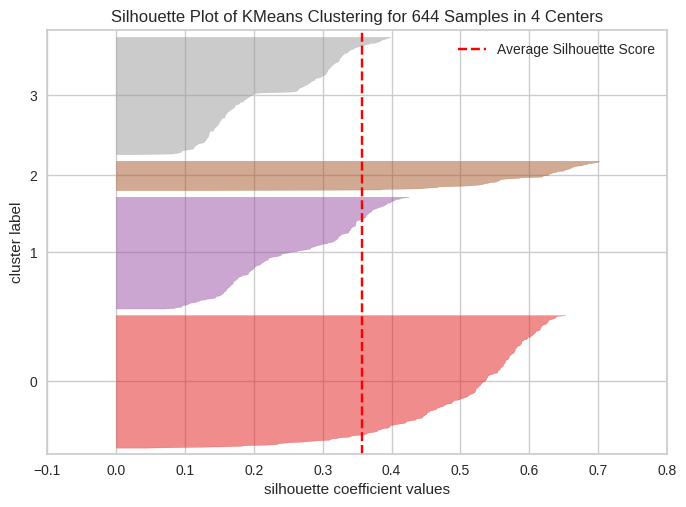

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 644 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

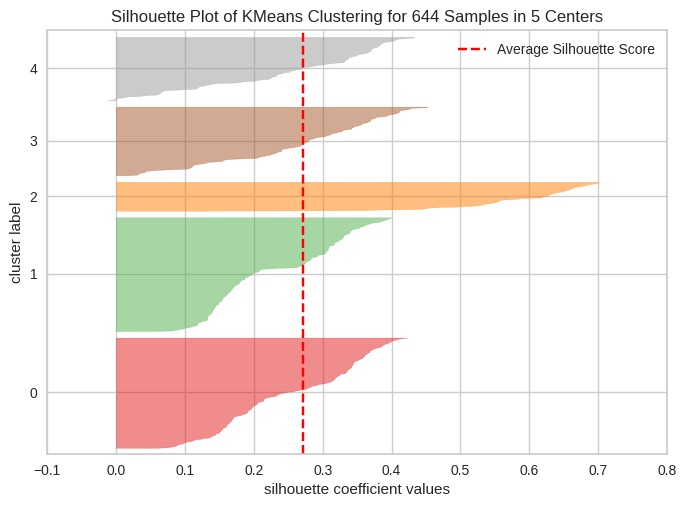

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 644 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

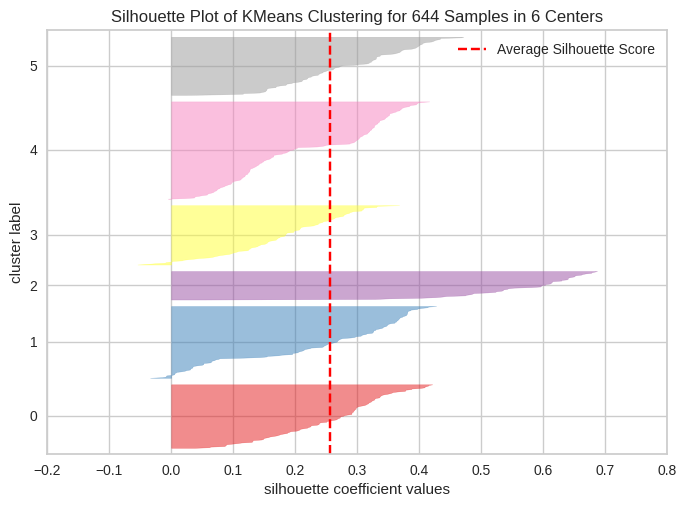

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 644 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

- The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters.

- Clearly,K=3, clusters seem very reasonable for creating Final model of this case Study

### Creating Final Model

In [ ]:
%%time
kmeans = KMeans(n_clusters=3, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

CPU times: user 29.9 ms, sys: 0 ns, total: 29.9 ms
Wall time: 24.9 ms


KMeans(n_clusters=3, random_state=1)

Cluster 3 seems good for this case study  

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

In [ ]:
 #adding kmeans cluster labels to the original and scaled dataframes
data_scaled_df = pd.DataFrame(subset_scaled, columns=data.iloc[:,1:-1].columns.unique().tolist())
df['cluster'] = kmeans.labels_
data_scaled_df['cluster'] = kmeans.labels_

# Customer Profiling - Visualize the Clusters with Features

plt.figure(figsize=(20, 26))

sns.pairplot(data_scaled_df, diag_kind='kde', corner=True, hue='cluster', palette='Set2');

In [ ]:
plt.figure(figsize=(20, 26))
#sns.pairplot(data_scaled_df, diag_kind='kde', corner=True, hue='cluster', palette='Set2');

<Figure size 2000x2600 with 0 Axes>

<Figure size 2000x2600 with 0 Axes>

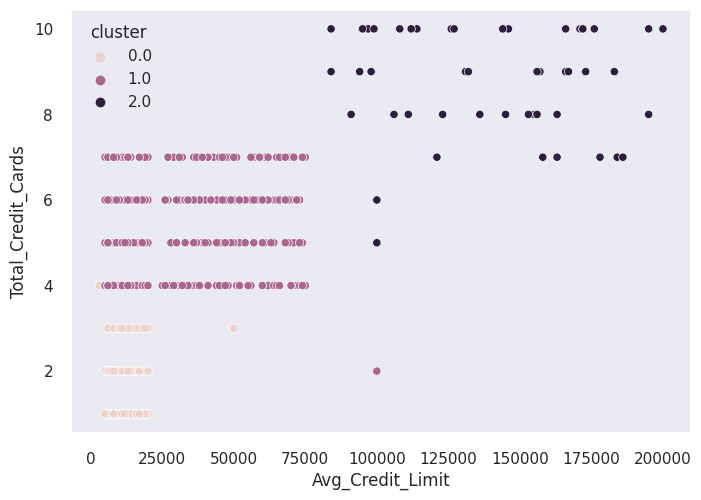

In [ ]:
sns.set(style='dark')

sns.scatterplot(x=data['Avg_Credit_Limit'],
y=data['Total_Credit_Cards'],
hue=df['cluster']),
palette=['blue', 'red', 'orange']

## Hierarchical Clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

-Average linkage minimizes the average of the distances between all observations of pairs of clusters.

-Single linkage minimizes the distance between the closest observations of pairs of clusters.



In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

- In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

- In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

### Computing Cophenetic Correlation
The cophenetic correlation for a cluster tree is defined as the linear correlation coefficient between the cophenetic distances obtained from the tree, and the original distances (or dissimilarities) used to construct the tree. Thus, it is a measure of how faithfully the tree represents the dissimilarities among observations.

- The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

- The magnitude of this value should be very close to 1 for a high-quality solution. This measure can be used to compare alternative cluster solutions obtained using different algorithms.


In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7396484962742922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8790211779160426.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977481558433797.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8817699389400929.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7393553884345768.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8525625522568208.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8963841407644122.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8927618943612573.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7047232336827077.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6721760184808403.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8307196165796448.
Cophenetic co

In [ ]:
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:

    print("-" * 50)

    for lm in linkage_methods:

        # -------------------Default is Euclidean Distance for Linkage

        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))

        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, round(c, 3)
            )
        )

        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

--------------------------------------------------
Cophenetic correlation for Euclidean distance and single linkage is 0.74.
Cophenetic correlation for Euclidean distance and complete linkage is 0.879.
Cophenetic correlation for Euclidean distance and average linkage is 0.898.
--------------------------------------------------
Cophenetic correlation for Chebyshev distance and single linkage is 0.739.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.853.
Cophenetic correlation for Chebyshev distance and average linkage is 0.896.
--------------------------------------------------
Cophenetic correlation for Mahalanobis distance and single linkage is 0.705.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.672.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.831.
--------------------------------------------------
Cophenetic correlation for Cityblock distance and single linkage is 0.726.
Cophenetic correlation for Cityb

In [ ]:
#printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977481558433797, which is obtained with average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7396484962742922.
Cophenetic correlation for complete linkage is 0.8790211779160426.
Cophenetic correlation for average linkage is 0.8977481558433797.
Cophenetic correlation for centroid linkage is 0.8942620392610876.
Cophenetic correlation for ward linkage is 0.7405240222050065.
Cophenetic correlation for weighted linkage is 0.8817699389400929.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print()
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.8977481558433797, which is obtained with average linkage.


**Observations**
 cophenet index is maximum with Cophenetic correlation for euclidean distance and average linkage is 0.9161115900898735


### Checking Dendrograms

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

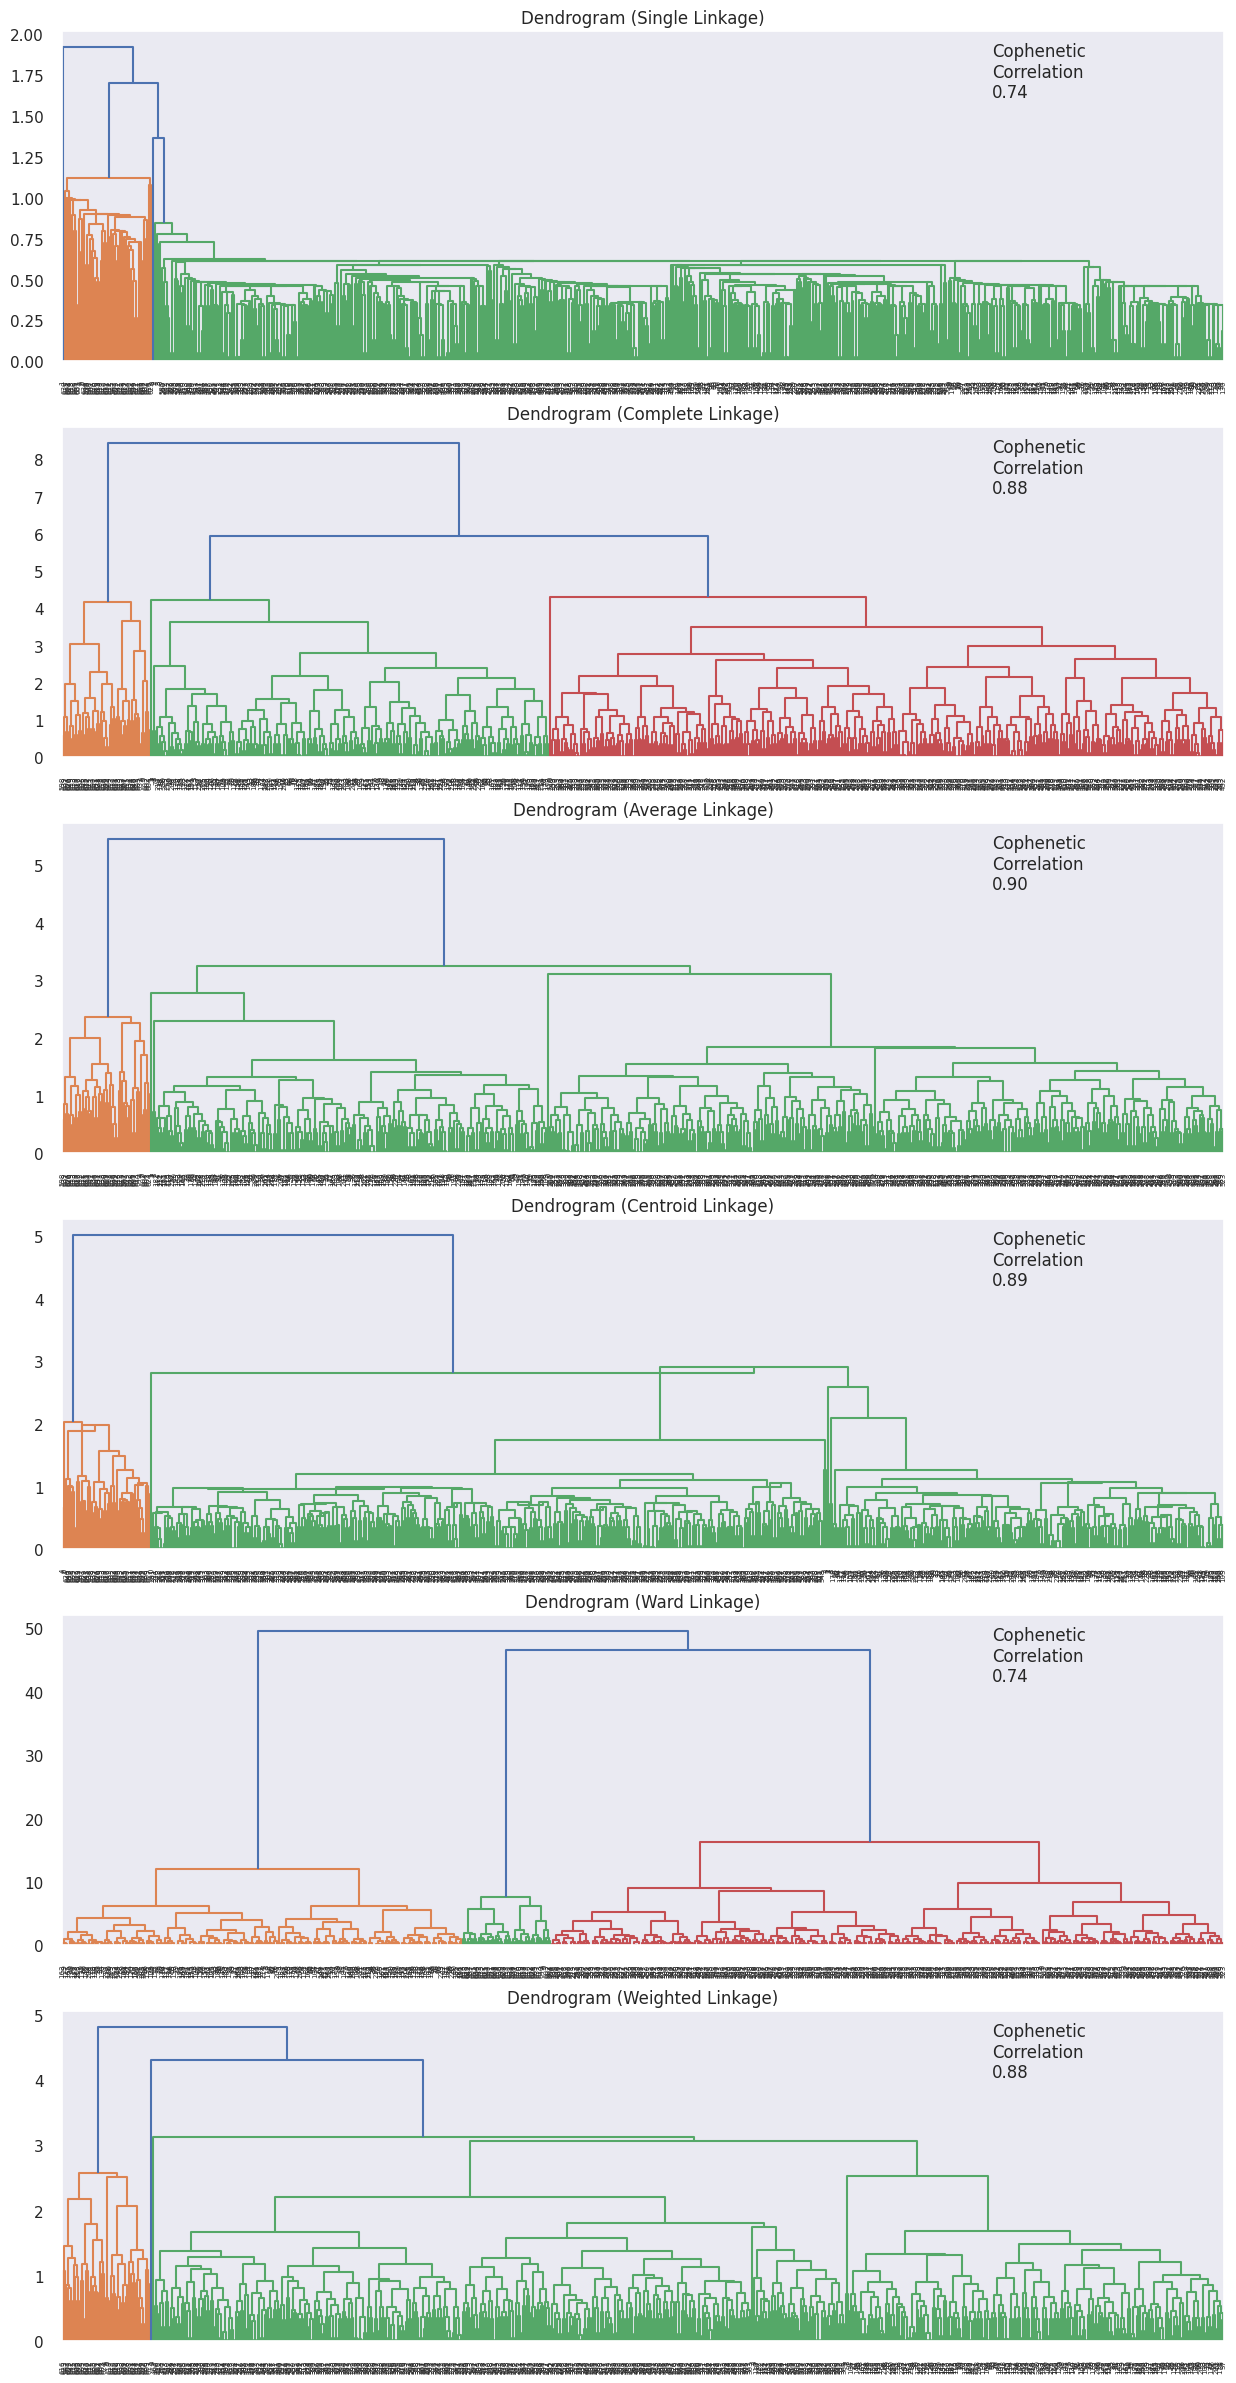

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Dendrogram with average linkage shows distinct and separate cluster tree.**

**Observations**

- Dendrogram with ward linkage method shows distinct and separate cluster compared to other clusters

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739648
4,ward,0.740524
1,complete,0.879021
5,weighted,0.881770
3,centroid,0.894262
2,average,0.897748


 The dendrogram of 'mahalanobis','cityblock' with 'average', 'weighted' linkage method as they gave high cophenetic correlation value

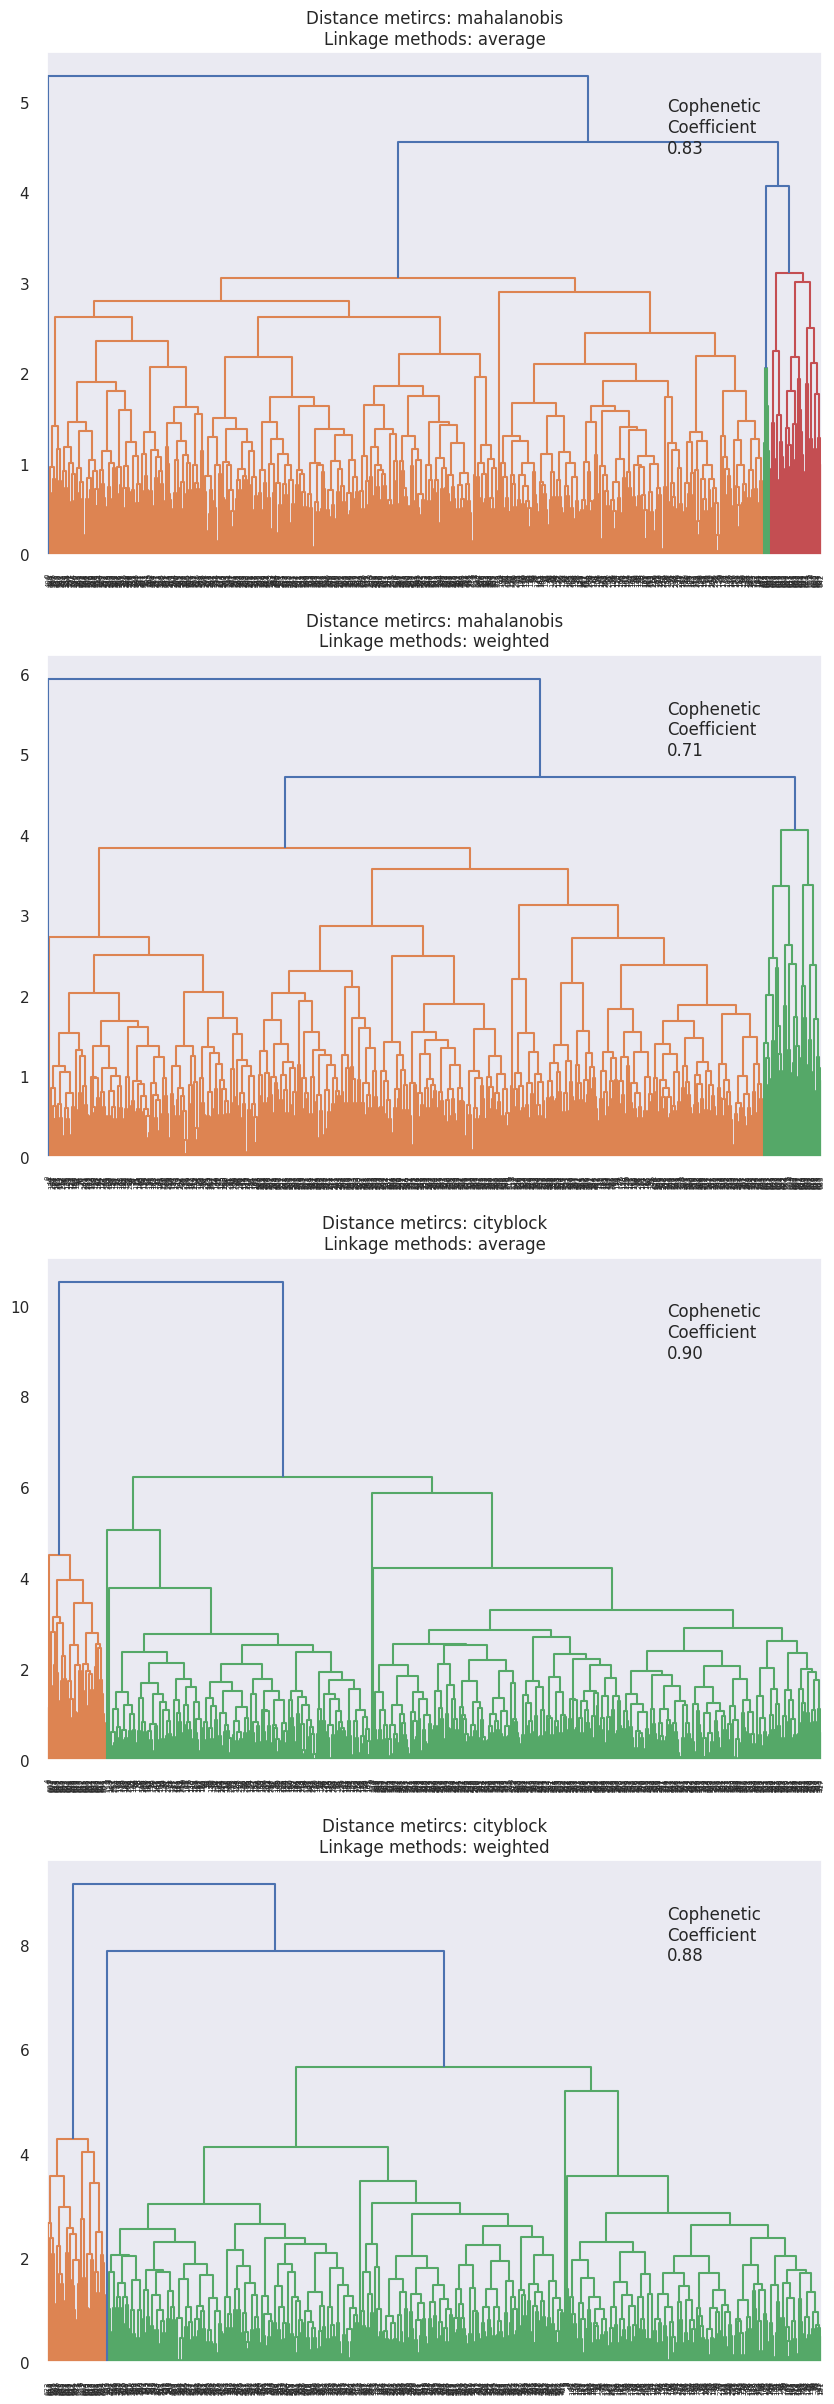

In [ ]:
distance_metrics = [ 'mahalanobis','cityblock']
linkage_methods = ['average', 'weighted']
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}',
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        i +=1

**Observations**

The cophenetic correlation is highest for average linkage methods.

Dendrogram with average linkage shows distinct and separate cluster tree.

In [ ]:
#Trying with K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage="average")
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [ ]:
df['HC_Clusters'] = HCmodel.labels_
cluster_profile = df.groupby('HC_Clusters').mean()
cluster_profile['count_in_each_segments'] = df.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

### **Creating Final Model**
Let's create 3 clusters

In [ ]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

CPU times: user 18.3 ms, sys: 13 µs, total: 18.3 ms
Wall time: 26 ms


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [ ]:
hc_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982,0
1,0.413280,-0.779381,-1.473803,2.495669,1.873420,1
2,0.413280,1.060843,-0.858684,0.127148,0.135974,0
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974,0
4,1.750192,0.600787,-1.473803,3.172390,-0.211515,2


In [ ]:
df2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster,HC_Clusters,HC_segments
0,100000,2,1,1,0,1,0,0
1,50000,3,0,10,9,0,2,1
2,50000,7,1,3,4,1,0,0
3,30000,5,1,1,4,1,0,0
4,100000,6,0,12,3,2,1,2


In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [ ]:
# creating a copy of the original data
#df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

In [ ]:
km_cluster_profile = df1.groupby("K_means_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile = df1.groupby("K_means_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
km_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12239.819005,2.411765,0.945701,3.561086,6.891403,221
1,33893.048128,5.508021,3.489305,0.975936,1.997326,374
2,140102.040816,8.775510,0.591837,10.979592,1.102041,49


### Cluster Profiling: Hierarchical Clustering

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Avg_Credit_Limit"].count().values
)

In [ ]:
hc_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster,HC_Clusters
HC_segments,,,,,,,
0,33965.147453,5.509383,3.493298,0.973190,1.991957,1.000000,0.000000
1,12216.216216,2.423423,0.950450,3.554054,6.878378,0.004505,1.981982
2,140102.040816,8.775510,0.591837,10.979592,1.102041,2.000000,1.000000


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12239.819005,2.411765,0.945701,3.561086,6.891403,221
1,33893.048128,5.508021,3.489305,0.975936,1.997326,374
2,140102.040816,8.775510,0.591837,10.979592,1.102041,49


In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster,HC_Clusters
HC_segments,,,,,,,
0,33965.147453,5.509383,3.493298,0.973190,1.991957,1.000000,0.000000
1,12216.216216,2.423423,0.950450,3.554054,6.878378,0.004505,1.981982
2,140102.040816,8.775510,0.591837,10.979592,1.102041,2.000000,1.000000


<Axes: xlabel='K_means_segments'>

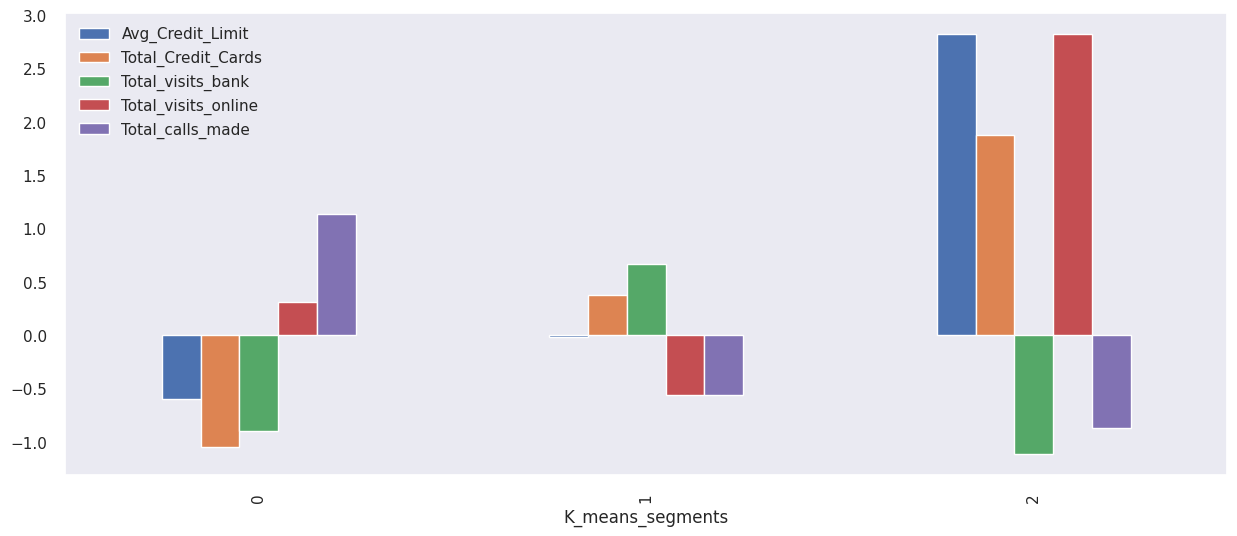

In [ ]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='HC_segments'>

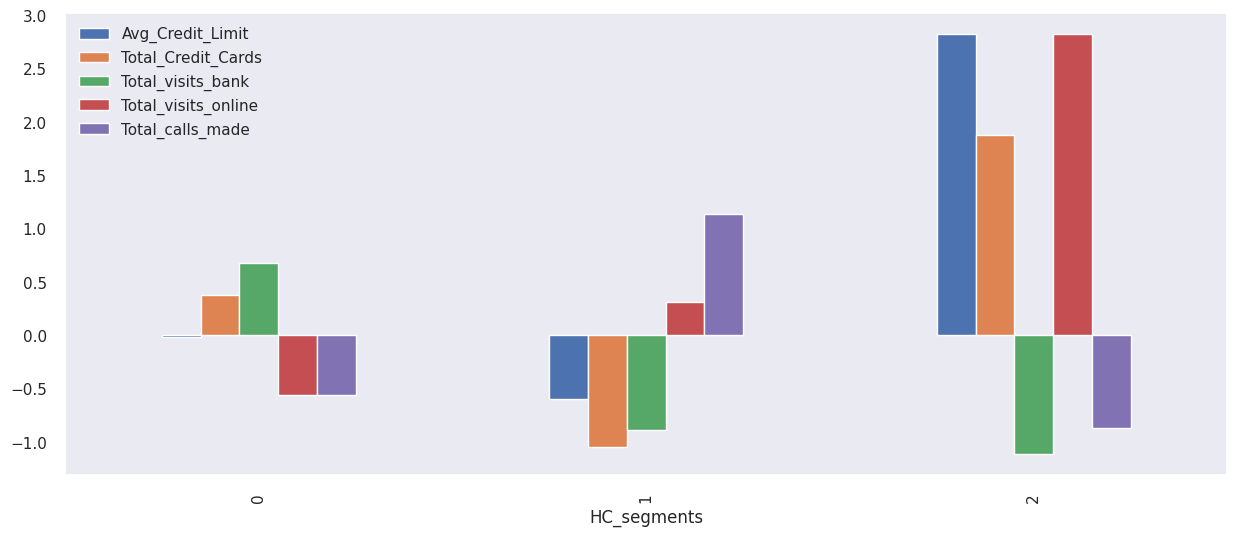

In [ ]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

In [ ]:
k_means_df.loc[k_means_df["K_means_segments"] == 1, "K_means_segments"] = 3
k_means_df.loc[k_means_df["K_means_segments"] == 2, "K_means_segments"] = 1
k_means_df.loc[k_means_df["K_means_segments"] == 3, "K_means_segments"] = 2
df1["K_means_segments"] = k_means_df["K_means_segments"]

km_cluster_profile = df1.groupby("K_means_segments").mean()
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0.000000,12293.577982,2.422018,0.949541,3.568807,6.885321,218
1.000000,109270.833333,7.708333,1.437500,7.854167,1.208333,48
2.000000,33187.845304,5.461326,3.469613,0.988950,2.069061,362


<Axes: xlabel='K_means_segments'>

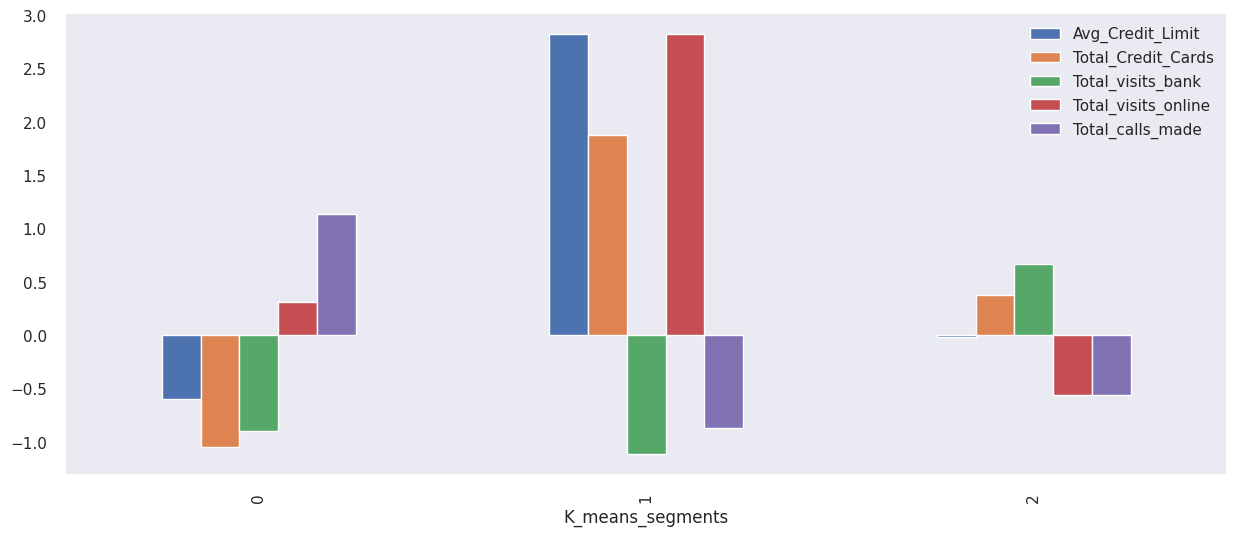

In [ ]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

**Let's create some plots on the original data to understand the customer distribution among the clusters.**

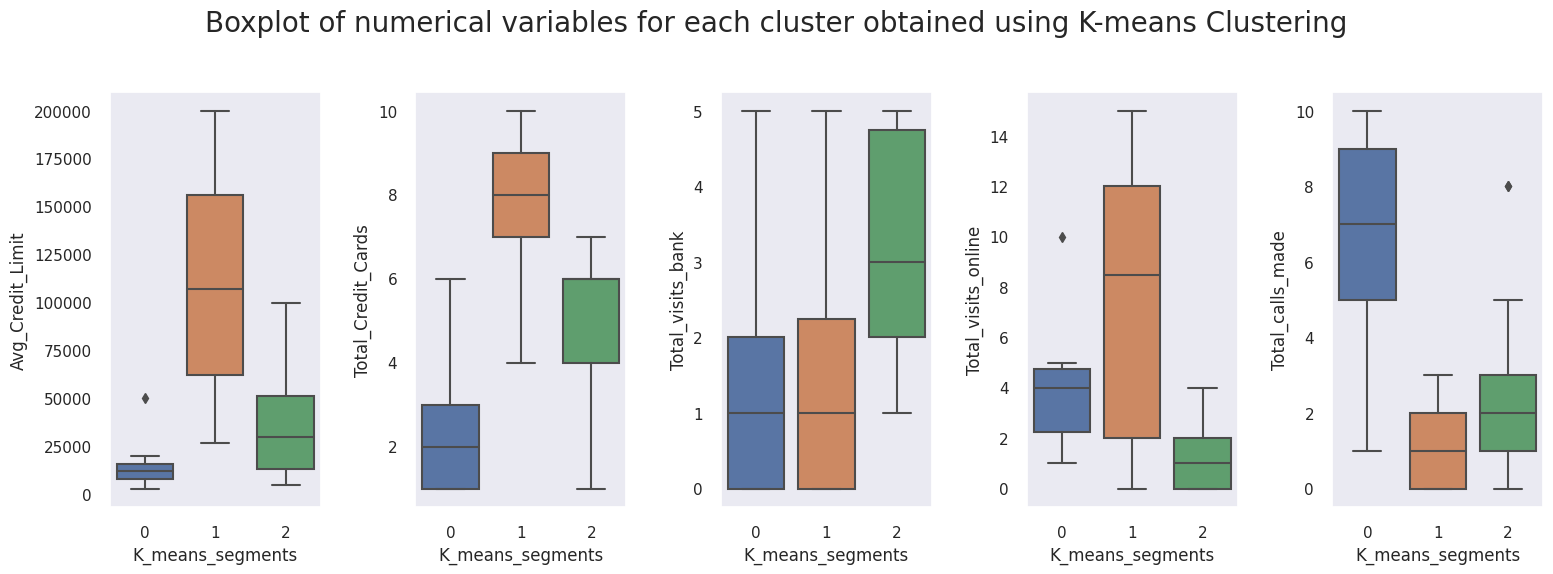

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

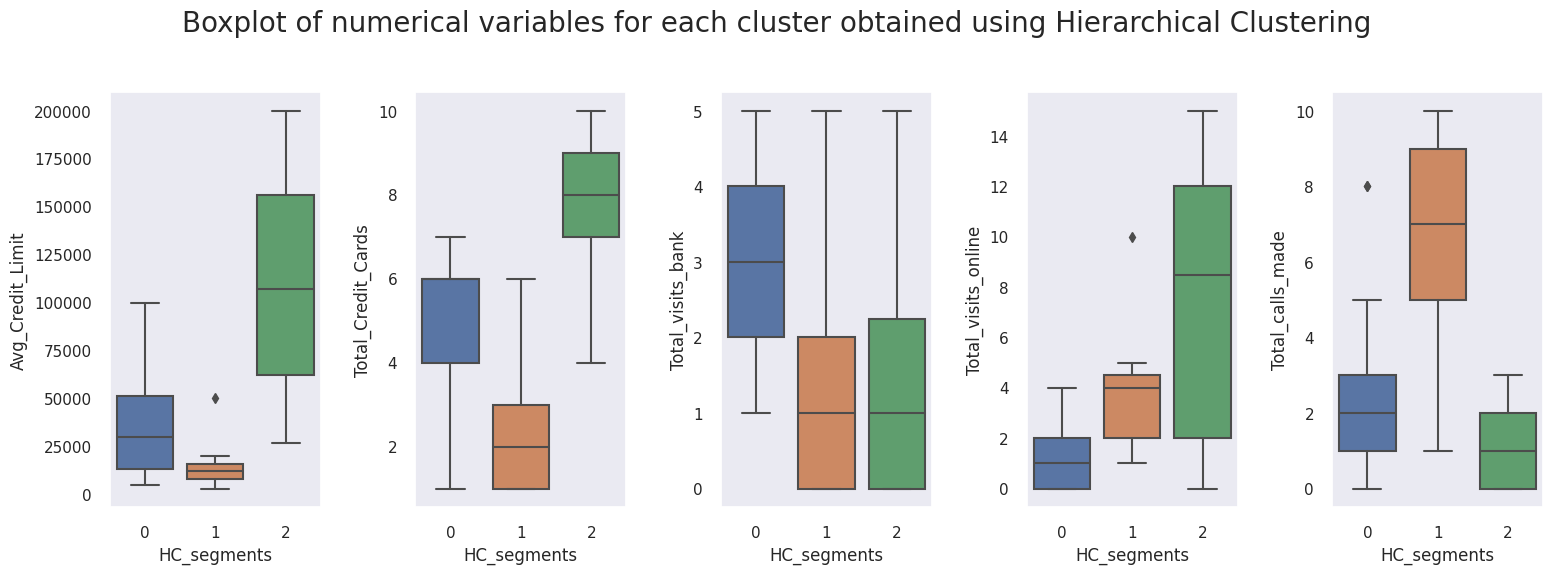

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

___

**Actionable Insights and Recommendations**:
- We have identified three different segments of customers based on credit limit and communication source and
customer behaviour with the bank
- In-person customers: These customer preference is here bank transactions in person. They have less credit cards and
medium available credit as compared to online customer.
-  Phone call customers: They have least credit cards and lower amount of card limit.
- Online customers: They have the most credit cards and the highest available credit. Least number of customers have
this type of behavior.
- Recommendations:
-  The customer preferneces: Online/ Phonecall customers will probably prefer email/text notifications.
-  The In-Person Customers prefer mail notifications and promotional flyers at the loction.
-  The Phone and In-Person customers should be join online banking too.

- We have identified three different categories of customers based on credit limit and mode of
communication with the bank

- Customer Segment 0 – High Credit Limit/Hold Most Credit Cards/Online Preference
    - Preference of online banking, they are the the high spenders with multiple credit cards, and make up about 8%
of the customer base.
    - Recommendation: They can be targeted by online campaigns and incentivized for new products.
- Customer Segment 1 – Medium Credit Limit/Hold Average No. of Credit Cards/In-Person Banking Preference
 - Perference of in-person banking, the make up majority of the customer base (58%).
  - Recommendation: More customers should be incentivized use online services for better tracking and resolution
time for issues, as well as being able to be targeted for online campaigns. Additionally, in-person specials
should be introduced to upsell the customers
- Customer Segment 2 – Low Credit Limit/Least Credit Cards/Phone Banking Preference
     - Preference of phone banking, make up about 34% of the customer base.
     - Recommendation: Should be incentivized to use online services or in -person. This will make it easier to target
them for upselling, as well as track and improve customer service.
